In [ ]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/City Tech/Spring 2025/Machine Learning Fundamentals CST 4702/Datasets & Collabs/UCI Adult Income dataset - Decision Tree/adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# data

In [ ]:

# Hints
# label encoder method and replace
# convert categorical value to numerical label using label encoder


In [ ]:
# Preprocessing
# Handling missing values

data.replace('?', None, inplace=True)
# data.dropna(inplace=True)
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,None,103497,Some-college,10,Never-married,None,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Handling the categorical column

# df_copy = data.copy()
lbe = LabelEncoder() #   Use a label encoding instead of binarizer because encoding can handle more than 2 variables in categorical columns

# Fitting the column
categorical_columns = ['workclass', 'education','marital-status', 'occupation',
                       'relationship', 'race', 'gender', 'native-country', 'income']

for col in categorical_columns:
  data[col] = lbe.fit_transform(data[col])

In [ ]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,3,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,3,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,18,8,103497,15,10,4,14,3,4,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
48838,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
48839,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
48840,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [ ]:
# Assignment of features and target

X = data.drop('income', axis=1)
y = data['income']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the model

dtc = DecisionTreeClassifier(max_depth=9, min_samples_split=10, criterion='gini')
y_pred = dtc.fit(X_train, y_train).predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
# Accuracy Score

print('Decision Tree Score: ', dtc.score(X_test, y_test))

Decision Tree Score:  0.8628267249027503


By changing the parameters of the Decision Tree Classifier, I notice that the score changes quickly by decreasing or increasing the max depth value.

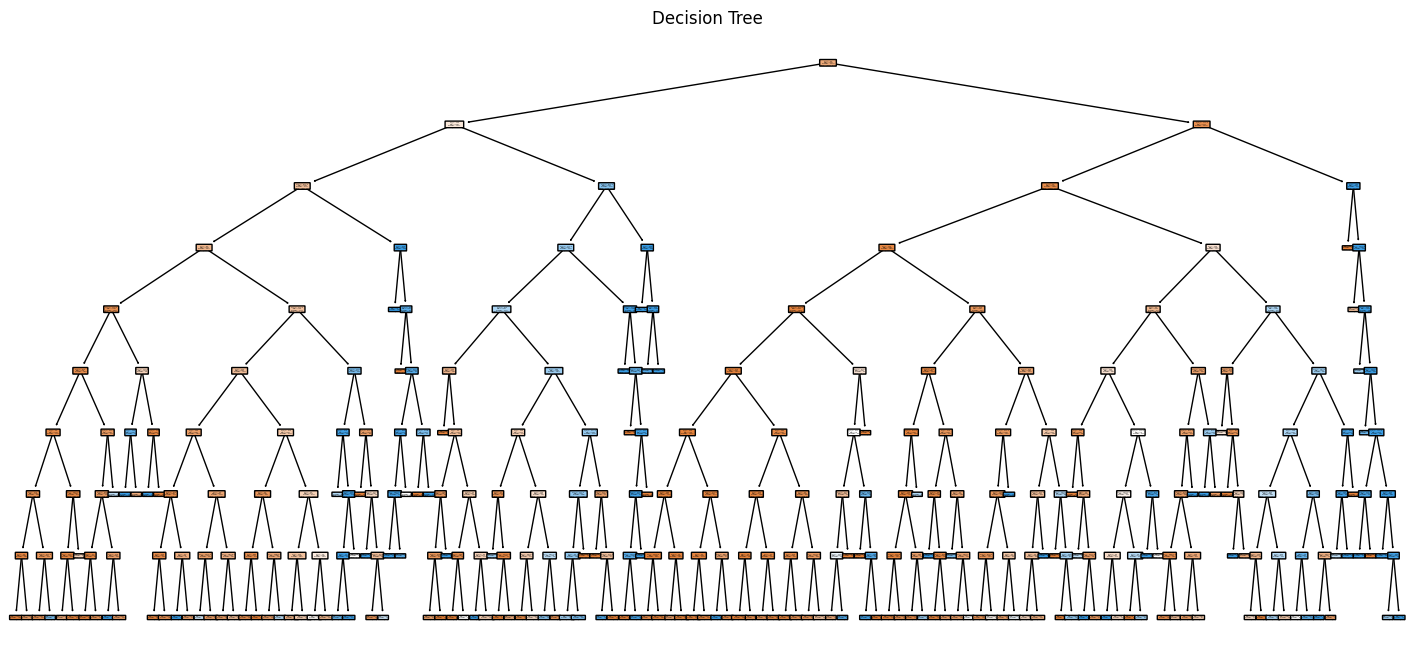

In [ ]:
# Visualization of the tree

plt.figure(figsize=(18, 8))
plot_tree(dtc, filled=True, rounded=True) # feature_names=data.feature_names, class_names=data.class_names,
plt.title("Decision Tree")
plt.show()

In [ ]:
#  Using graphviz

